In [13]:
%matplotlib inline
import analysis as an
import numpy as np
import matplotlib.pyplot as plt
reload(an)
X,Xi = an.retrieve_X_Xi()
M =  an.retrieve_M()
R = an.retrieve_R('k5')
Ro = an.retrieve_R('k5-original')
R6 = an.retrieve_R('k6')
R7 = an.retrieve_R('k7')
R9 = an.retrieve_R('k9')

Loading places/bristol25
summary
analysis/bristol25/metrics/summary/Telford and Wrekin
summary
analysis/bristol25/metrics/summary/Telford and Wrekin
summary
analysis/bristol25/metrics/summary/Telford and Wrekin
summary
analysis/bristol25/metrics/summary/Telford and Wrekin
summary
analysis/bristol25/metrics/summary/Telford and Wrekin
summary
analysis/bristol25/metrics/summary/Telford and Wrekin
summary
analysis/bristol25/metrics/summary/Telford and Wrekin
summary
analysis/bristol25/metrics/summary/Telford and Wrekin
summary
analysis/bristol25/metrics/summary/Telford and Wrekin
summary
analysis/bristol25/metrics/summary/Telford and Wrekin
summary
analysis/bristol25/metrics/summary/Telford and Wrekin
summary
analysis/bristol25/metrics/summary/Telford and Wrekin
summary
analysis/bristol25/metrics/summary/Telford and Wrekin
summary
analysis/bristol25/metrics/summary/Caerphilly
summary
analysis/bristol25/metrics/summary/Caerphilly
summary
analysis/bristol25/metrics/summary/Caerphilly
summary

In [14]:
# Remove all the nan values because they are supposed to be 0
def nan2zero(M):
    filter = np.isnan(M)
    print sum(filter), 'nan zeroed.'
    M = np.array(M)
    M[filter] = 0
    return M

# Define required variables

normdict = {'D':'D90','T':'T90f','Q':'Qp'}

mat = []
normmat = []
logmat = []
lognormmat = []

nl = {}
npl = {}

lab = an.lab
pl = an.pl
unit = an.unit

for l in lab:
    m = R[l]
    # Remove nan from the following labels
    if l in ['Qmb','Q50b','Q90b','Qmf2','Tp']:
        print l
        m = nan2zero(m)
        
    # Normalising vector
    try:
        # label to normalise with
        nw = normdict[l[0]]
        # matrix to normalise with
        n = R[nw]
        # labels
        nl[l] = '{0}/{1}'.format(l,nw)
        npl[l] = '{0}/{1}'.format(pl[l],pl[nw])
    except KeyError:
        n = 1.
        nl[l] = l
        npl[l] = pl[l]
        print 'Could not normalise for',l
        
    mat.append(m)
    normmat.append(m/n) 
    
    logmat.append(np.log(m))
    lognormmat.append(np.log(m/n)) 
        
cor = np.corrcoef(mat)
normcor = np.corrcoef(normmat)
logcor = np.corrcoef(logmat)
lognormcor = np.corrcoef(lognormmat)

Could not normalise for N
Could not normalise for W
Qmf2
0 nan zeroed.
Qmb
0 nan zeroed.
Q50b
0 nan zeroed.
Q90b
0 nan zeroed.


/Users/bharatkunwar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:50: RuntimeWarning: divide by zero encountered in log
/Users/bharatkunwar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:51: RuntimeWarning: divide by zero encountered in log
/Users/bharatkunwar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:50: RuntimeWarning: invalid value encountered in log
/Users/bharatkunwar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:51: RuntimeWarning: invalid value encountered in log


In [15]:
print 'Number of catchment areas',len(R['T90'])
# Prints out the index of catchment areas if population is not equal: should be empty
print 'This should be empty',[(i,r) for i,r in enumerate(zip(R['N'],R6['N'])) if not r[0]==r[1]]

Number of catchment areas 704
This should be empty []


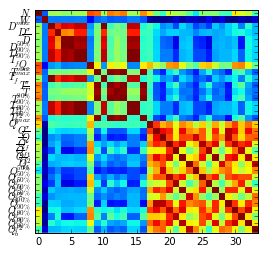

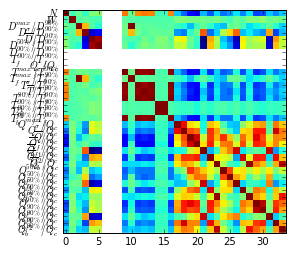

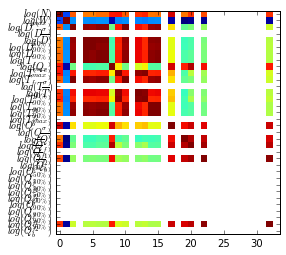

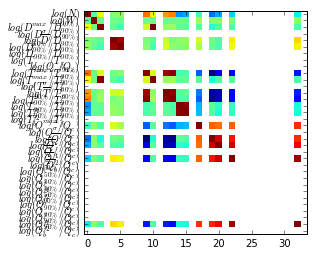

In [16]:
plt.figure()
plt.imshow(cor,interpolation="none")
plt.yticks(range(len(lab)),['${0}$'.format(pl[l]) for l in lab])
plt.savefig('figs/corr.pdf')

plt.figure()
plt.imshow(normcor,interpolation="none")
plt.yticks(range(len(lab)),['${0}$'.format(npl[l]) for l in lab])
plt.savefig('figs/normcorr.pdf')

plt.figure()
plt.imshow(logcor,interpolation="none")
plt.yticks(range(len(lab)),['$log({0})$'.format(pl[l]) for l in lab])
plt.savefig('figs/logcorr.pdf')

plt.figure()
plt.imshow(lognormcor,interpolation="none")
plt.yticks(range(len(nl)),['$log({0})$'.format(npl[l]) for l in lab])
plt.savefig('figs/lognormcorr.pdf')

poly [ 0.89880032  0.13250803]
poly [ 0.77905877  0.25237814]
poly [ 0.61094329  0.43559141]


/Users/bharatkunwar/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


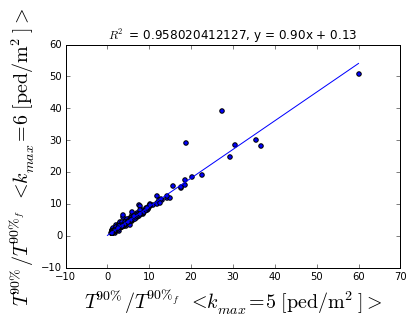

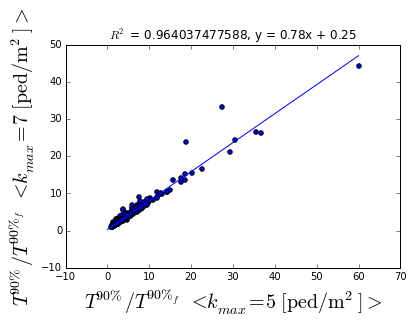

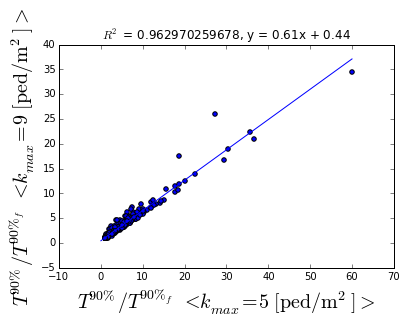

In [17]:
import matplotlib.pyplot as plt

def correlate(Rx,Ry,labx,laby):
    plt.figure()
    nz = np.nonzero(Rx['T90f'])
    x = (Rx['T90']/Rx['T90f'])[nz]
    y = (Ry['T90']/Ry['T90f'])[nz]

    # x = np.log(x)
    # y = np.log(y)

    p = np.polyfit(x,y,1)
    c = np.corrcoef(x,y)

    print 'poly',p

    xp = np.arange(0,max(x))
    yp = np.polyval(p,xp)

    plt.plot(xp,yp)

    plt.scatter(x,y)
    # plt.xscale('log')
    # plt.yscale('log')
    plt.xlabel('$T^{90\%}/T^{90\%_f}\ <k_{max} = '+labx+'\ \mathrm{[ped/m^2]}>$',fontsize=20)
    plt.ylabel('$T^{90\%}/T^{90\%_f}\ <k_{max} = '+laby+'\ \mathrm{[ped/m^2]}>$',fontsize=20)
    plt.title('$R^2$ = {}, y = {:0.2f}x + {:0.2f}'.format(c[0,1]**2,p[0],p[1]))
    plt.savefig('figs/T90-T90f-k{}-k{}.pdf'.format(labx,laby))
    
correlate(R,R6,'5','6')
correlate(R,R7,'5','7')
correlate(R,R9,'5','9')

In [18]:
# Function to plot which against all the other labels
def plot_corr(which,norm=True):
    index = lab.index(which)    
    for m,nm,lm,lnm,c,nc,lc,lnc,l in zip(mat,normmat,logmat,lognormmat,cor[index],normcor[index],logcor[index],lognormcor[index],lab):

        fontsize = 15
        
        c = abs(c)**2
        if c > 0.5:
            x = mat[index]
            y = m
            labx = '${0}$'.format(pl[lab[index]])
            laby = '${0}$'.format(pl[l])
                        
            plt.figure()
            plt.scatter(x,y,label='$r^2=%0.2f$'%c,color='b')
            plt.xlabel(labx,fontsize=fontsize)
            plt.ylabel(laby,fontsize=fontsize)
            plt.legend()    

        c = abs(lc)**2
        if c > 0.5:        
            x = logmat[index]
            y = lm
            labx = '$log({0})$'.format(pl[lab[index]])
            laby = '$log({0})$'.format(pl[l])
            
            plt.figure()
            plt.scatter(x,y,label='$r^2=%0.2f$'%c,color='g')
            plt.xlabel(labx,fontsize=fontsize)
            plt.ylabel(laby,fontsize=fontsize)
            plt.legend() 

        c = abs(nc)**2
        if c > 0.5:        
            x = normmat[index]
            y = nm
            labx = '${0}$'.format(npl[lab[index]])
            laby = '${0}$'.format(npl[l])
            
            plt.figure()
            plt.scatter(x,y,label='$r^2=%0.2f$'%c,color='r')
            plt.xlabel(labx,fontsize=fontsize)
            plt.ylabel(laby,fontsize=fontsize)
            plt.legend()       

        c = abs(lnc)**2
        if c > 0.5:        
            x = lognormmat[index]
            y = lnm
            labx = '$log({0})$'.format(npl[lab[index]])
            laby = '$log({0})$'.format(npl[l])
            
            plt.figure()
            plt.scatter(x,y,label='$r^2=%0.2f$'%c,color='y')
            plt.xlabel(labx,fontsize=fontsize)
            plt.ylabel(laby,fontsize=fontsize)
            plt.legend()                 

- log(Qp) vs log(Qmf), R = 0.90
- log(Qmf/Qp) vs log(T90/T90f), R = 0.90

/Users/bharatkunwar/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


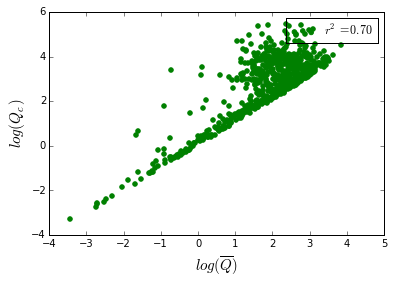

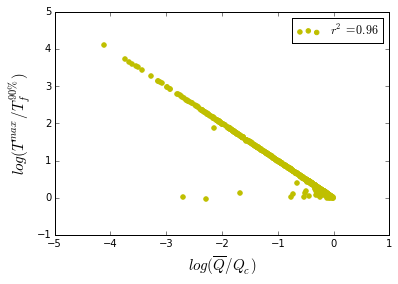

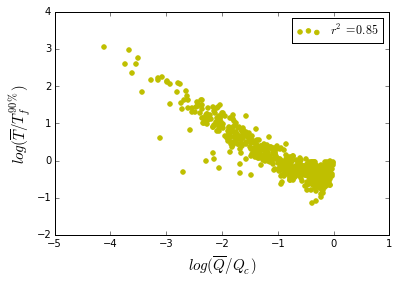

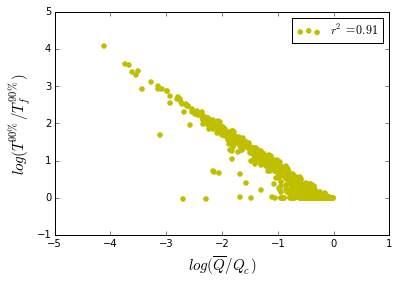

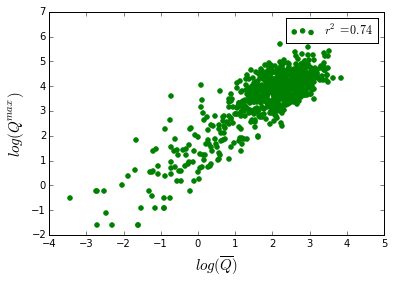

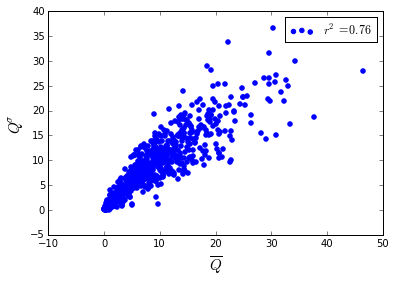

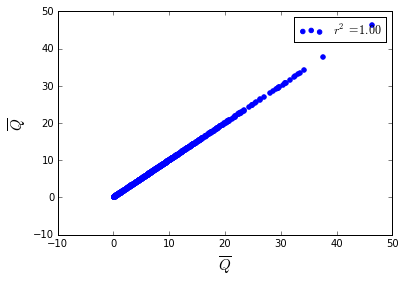

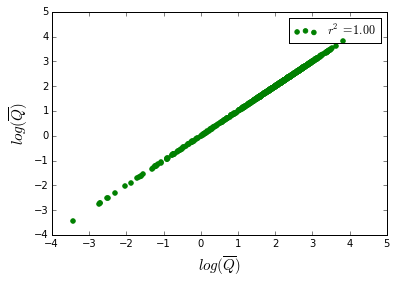

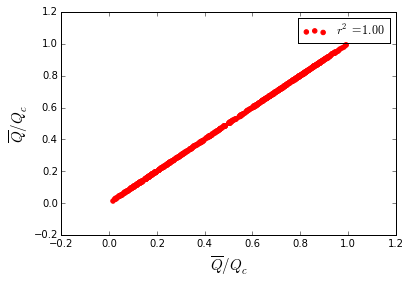

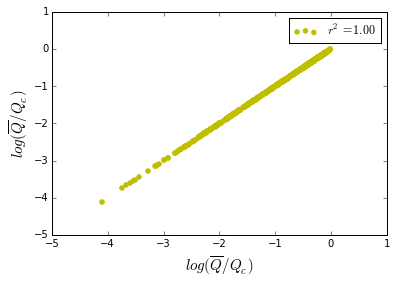

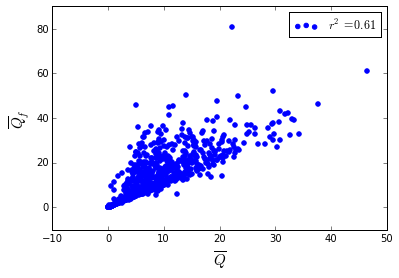

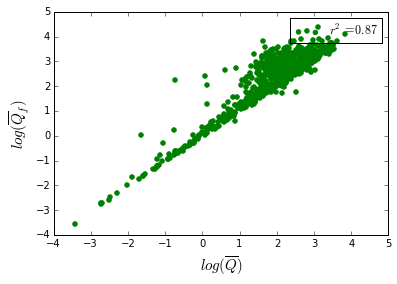

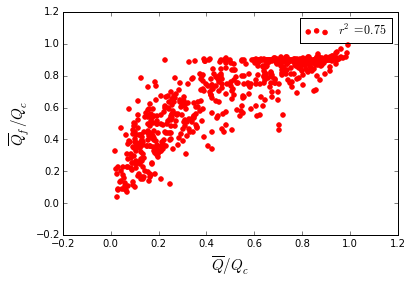

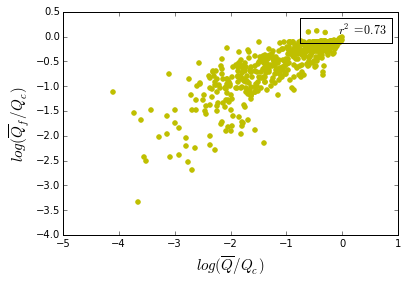

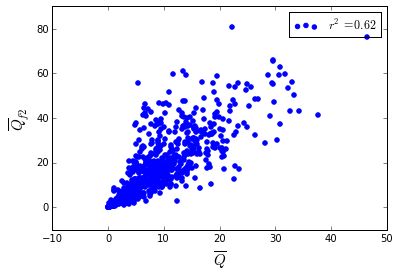

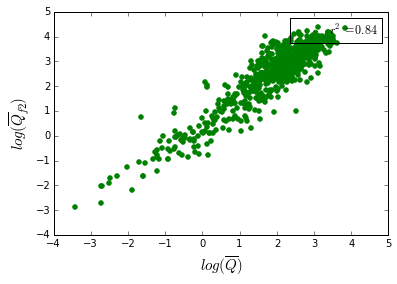

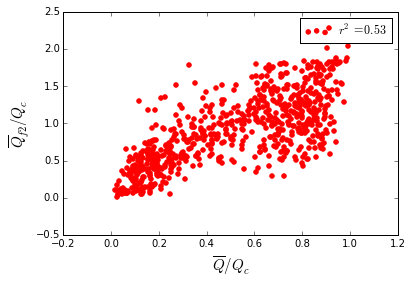

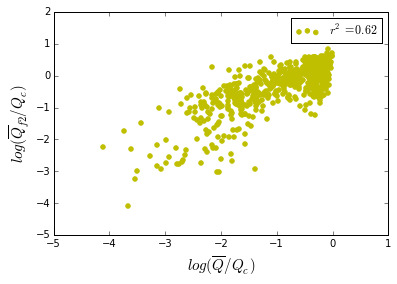

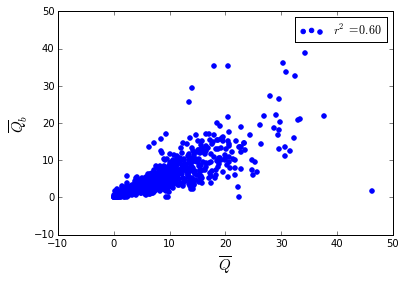

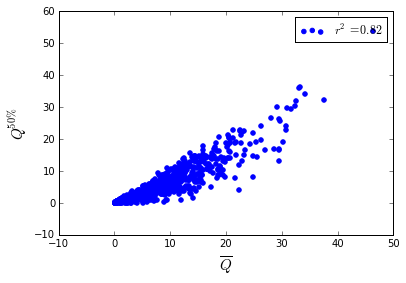

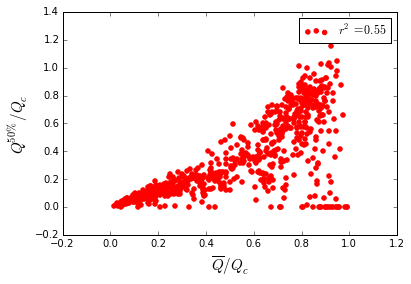

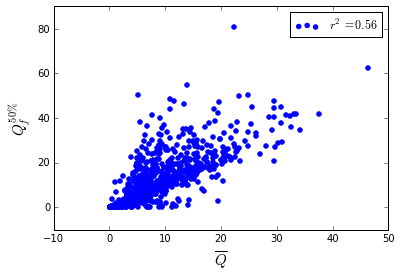

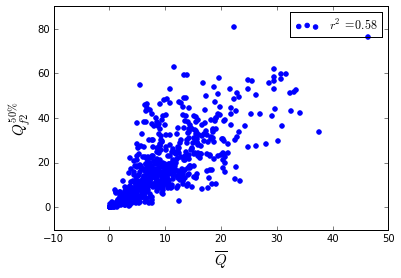

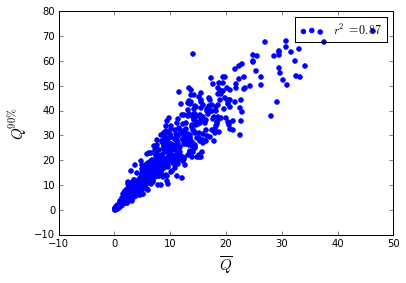

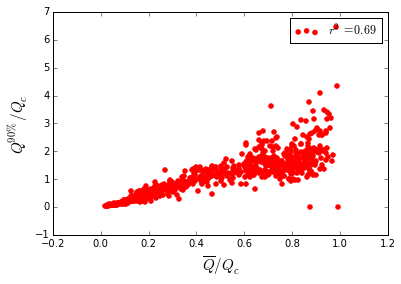

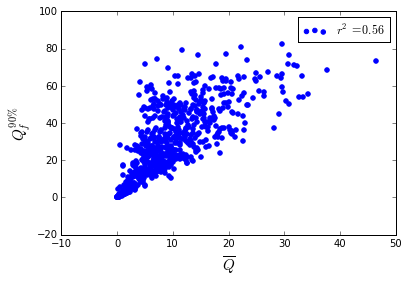

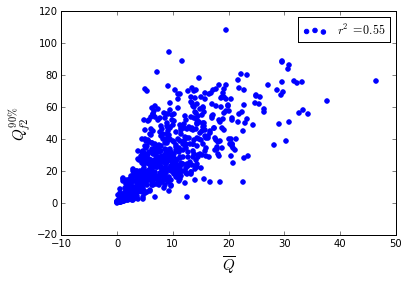

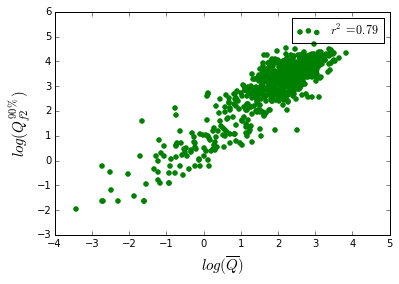

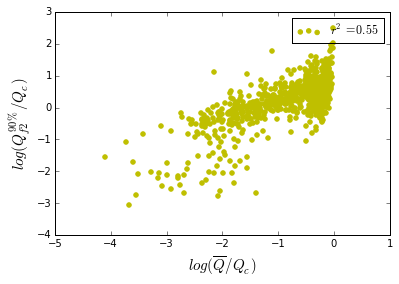

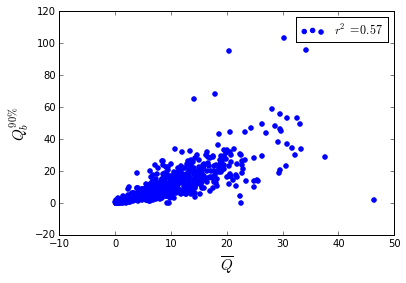

In [39]:
plot_corr('Qm')

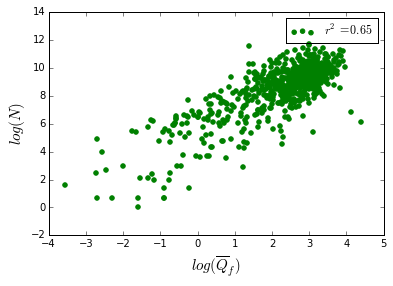

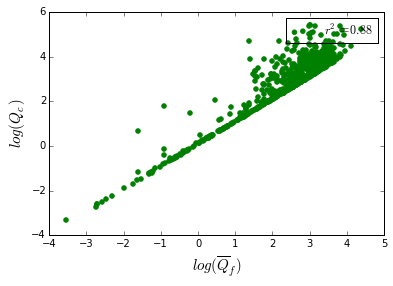

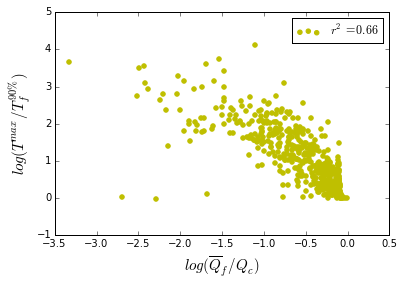

KeyboardInterrupt: 

In [39]:
# Print correlations against Qpred

plot_corr('Qmf')

ERROR! Session/line number was not unique in database. History logging moved to new session 711


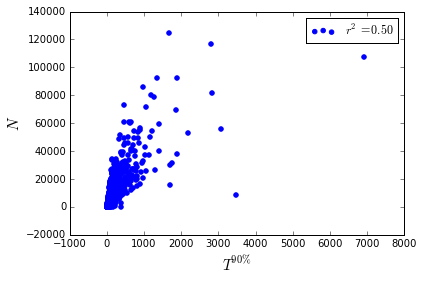

KeyboardInterrupt: 

In [39]:
# Print correlations against Q90f

plot_corr('T90')

In [9]:
import random
noofCA = len(mat[0])
dataindex = range(noofCA)
random.shuffle(dataindex)
train = dataindex[:int(noofCA/2)]
test = dataindex[int(noofCA/2):]
test = [202, 205, 645, 265, 316, 420, 614, 497, 487, 343, 610, 577, 695, 648, 299, 687, 231, 191, 579, 632, 666, 61, 157, 370, 2, 278, 27, 282, 190, 507, 136, 44, 170, 398, 560, 623, 78, 409, 628, 437, 340, 549, 306, 49, 424, 613, 152, 29, 220, 471, 661, 589, 250, 478, 31, 331, 122, 123, 697, 494, 300, 166, 413, 522, 209, 371, 583, 363, 652, 573, 272, 655, 477, 258, 256, 335, 551, 267, 195, 394, 42, 254, 144, 228, 365, 102, 158, 379, 514, 391, 204, 33, 454, 527, 65, 692, 348, 133, 426, 453, 199, 234, 77, 323, 43, 276, 439, 270, 60, 620, 675, 513, 368, 406, 30, 554, 120, 291, 156, 172, 588, 339, 329, 643, 318, 160, 230, 657, 545, 85, 473, 384, 412, 126, 325, 463, 392, 523, 38, 570, 543, 213, 567, 434, 57, 381, 374, 73, 188, 246, 93, 654, 432, 70, 286, 515, 626, 402, 653, 559, 305, 293, 11, 672, 686, 263, 512, 128, 690, 20, 699, 353, 25, 376, 625, 226, 444, 216, 242, 649, 455, 525, 59, 39, 168, 182, 183, 90, 564, 175, 701, 417, 8, 313, 516, 22, 100, 696, 303, 496, 607, 88, 693, 243, 21, 518, 262, 555, 562, 218, 576, 52, 72, 328, 637, 10, 357, 184, 703, 269, 385, 94, 603, 161, 508, 200, 634, 446, 422, 510, 660, 4, 669, 664, 382, 197, 66, 312, 618, 69, 106, 676, 540, 24, 68, 336, 95, 521, 341, 604, 533, 441, 290, 640, 530, 79, 252, 67, 361, 257, 498, 117, 35, 694, 468, 292, 124, 605, 677, 317, 531, 431, 493, 593, 3, 688, 482, 109, 266, 456, 326, 608, 617, 641, 506, 574, 674, 621, 489, 75, 646, 277, 586, 702, 310, 483, 511, 96, 244, 395, 327, 159, 612, 556, 375, 535, 451, 240, 601, 366, 658, 338, 504, 119, 458, 419, 393, 491, 449, 481, 1, 691, 99, 174, 297, 227, 150, 48, 23, 680, 167, 542, 210, 50, 307, 177, 206, 189, 627, 405, 503, 171, 390, 633, 192, 519, 71, 314, 203, 319, 581, 700]
train = [i for i in dataindex if i not in test]
# print test
# print train

In [10]:
fd = abm.FundamentalDiagram(k_vmin=5, k_lim=5, speedup=60)
l1 = 'Qp'
l2 = 'Qmf'

i1 = lab.index(l1)
i2 = lab.index(l2)

x = logmat[i1][train]
y = logmat[i2][train]

# function that returns a vector of deviation from best line of fit
def deviation(x,y,f):
    y_mean = np.polyval(f,x)
    return abs(y_mean-y)

plt.figure()

# what order to use in the polyfit function?
prev = 0
tol_order = 0
for order in range(1,10):
    f = np.polyfit(x,y,order)
    this = np.sqrt(sum(np.square(deviation(x,y,f))))
    if prev != 0:
        change = (prev/this)-1
        if change < 0.15 and tol_order == 0:
            tol_order = order-1
        print 'Between %i and %i,'%(order-1,order),'change of %0.2f observed (%0.3f,%0.3f).'%(change*100,prev,this)
    plt.scatter(order,this)  
    prev = this # Take the previous value

plt.ylim(0,None)

print 'We are going to go with order of %i.'%tol_order

# from the graph above, using higher order than 3 does not offer significant advantage in minimising deviation
f = np.polyfit(x,y,tol_order)

c = np.corrcoef(x,y)[0][1]**2

xplot = mat[i1][train]
yplot = mat[i2][train]

x_range = np.linspace(min(xplot),max(xplot),100)

import math

theta,gamma = f
gamma = math.exp(gamma)


print 'theta = ', theta, 'gamma = ',gamma

# For fitting y = Ae^(Bx), 
# take the logarithm of both side gives log y = Bx + log A.
# So just fit log y against x.

Qmax = fd.k_opt*fd.velocity(fd.k_opt)/fd.speedup

NameError: name 'abm' is not defined

In [11]:
plt.figure()

plt.scatter(xplot,yplot,color='g',label='$\mathrm{r^2 = %0.2f}$'%c)

plt.xscale('log')
plt.yscale('log')

plt.plot(x_range,x_range**f[0]*np.exp(f[1]),'b-',label='$\mathrm{{ {1} = \gamma ({0})^{{\\theta}} }}$'.format(pl[l1],pl[l2])) # A red solid line
plt.plot(x_range,x_range,'r--',label='$\mathrm{{{1} = {0}}}$'.format(pl[l1],pl[l2]))

plt.axvline(Qmax,c='y',linestyle='-.',label='$\mathrm{Q_c = Q_{max}}$')    

plt.legend(loc='upper left') # make a legend in the best location

fontsize=15
plt.xlabel('$\mathrm{{{0} \ {1}}}$'.format(pl[l1],unit[l1]),fontsize=fontsize)
plt.ylabel('$\mathrm{{{0} \ {1}}}$'.format(pl[l2],unit[l2]),fontsize=fontsize) # labels again
plt.gcf().subplots_adjust(bottom=0.15)

# plt.xlabel("$Q_s^{\overline{f}}/Q_p$") # labels again
# plt.ylabel("$ln(T_s^{90\%}/T_f^{90\%})$")
plt.savefig('./figs/{}/{}-{}.pdf'.format(sim,l1,l2))

NameError: name 'plt' is not defined

In [12]:
l1 = 'Qmf'
l2 = 'T90'

i1 = lab.index(l1)
i2 = lab.index(l2)

x = lognormmat[i1]
y = lognormmat[i2]

# function that returns a vector of deviation from best line of fit
def deviation(x,y,f):
    y_mean = np.polyval(f,x)
    return abs(y_mean-y)

plt.figure()

# what order to use in the polyfit function?
prev = 0
tol_order = 0
for order in range(1,10):
    f = np.polyfit(x,y,order)
    this = np.sqrt(sum(np.square(deviation(x,y,f))))
    if prev != 0:
        change = (prev/this)-1
        if change < 0.2 and tol_order == 0:
            tol_order = order-1
        print 'Between %i and %i,'%(order-1,order),'change of %0.2f observed (%0.3f,%0.3f).'%(change*100,prev,this)
    plt.scatter(order,this)  
    prev = this # Take the previous value

plt.ylim(0,None)

print 'We are going to go with order of %i.'%tol_order

# from the graph above, using higher order than 3 does not offer significant advantage in minimising deviation
f = np.polyfit(x,y,tol_order)

c = np.corrcoef(x,y)[0][1]**2

xplot = normmat[i1][train]
yplot = normmat[i2][train]

# For fitting y = Ae^(Bx), 
# take the logarithm of both side gives log y = Bx + log A.
# So just fit log y against x.    
alpha,beta = f
beta = math.exp(beta)    
print 'alpha = ', alpha, 'beta = ',beta

x_range = np.linspace(min(xplot),max(xplot),100)

NameError: name 'plt' is not defined

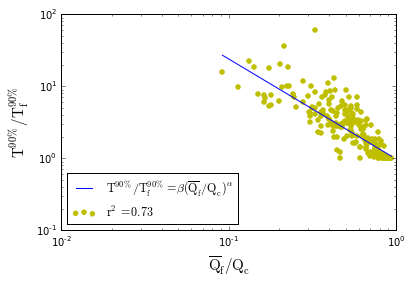

In [52]:
plt.figure()
plt.scatter(xplot,yplot,color='y',label='$\mathrm{r^2 = %0.2f}$'%c)

plt.xscale('log')
plt.yscale('log')

plt.plot(x_range,x_range**alpha*beta,'b-',label='$\mathrm{{ {1} = \\beta ({0})^{{\\alpha}} }}$'.format(npl[l1],npl[l2])) # A red solid line

plt.legend(loc='lower left') # make a legend in the best location

fontsize=15
plt.xlabel('$\mathrm{{{0}}}$'.format(npl[l1]),fontsize=fontsize)
plt.ylabel('$\mathrm{{{0}}}$'.format(npl[l2]),fontsize=fontsize) # labels again
plt.gcf().subplots_adjust(bottom=0.15)    

plt.savefig('./figs/{}/{}-{}.pdf'.format(sim,nl[l1].replace('/',':'),nl[l2].replace('/',':')))

In [54]:
x0 = R['T90f'][test]
x1 = R['Qp'][test]
y = R['T90'][test]
omega = beta*gamma**alpha
phi = alpha*(theta-1)
print 'omega = ',omega, 'phi=', phi
x=omega*x0*x1**phi

y6 = R6['T90'][test]
y7 = R7['T90'][test]

# x=x/x0
# y=y/x0

c = np.corrcoef(x,y)[0,1]**2
c6 = np.corrcoef(x,y7)[0,1]**2
c7 = np.corrcoef(x,y7)[0,1]**2
print c,c6,c7
cl = np.corrcoef(np.log(x),np.log(y))[0,1]**2
cl6 = np.corrcoef(np.log(x),np.log(y6))[0,1]**2
cl7 = np.corrcoef(np.log(x),np.log(y7))[0,1]**2
print cl,cl6,cl7

x_range = np.linspace(min(x),max(x))

f = np.polyfit(np.log(x),np.log(y),tol_order)
f7 = np.polyfit(np.log(x),np.log(y7),tol_order)
f6 = np.polyfit(np.log(x),np.log(y6),tol_order)

zeta, eta = f
eta = np.exp(eta)

print 'zeta = ',zeta, 'eta=', eta

omega =  0.942449917429 phi= 0.246119908553
0.299495759193 0.313555485862 0.313555485862
0.819232227193 0.83084632565 0.842230354039
zeta =  1.0836218506 eta= 0.715202207145


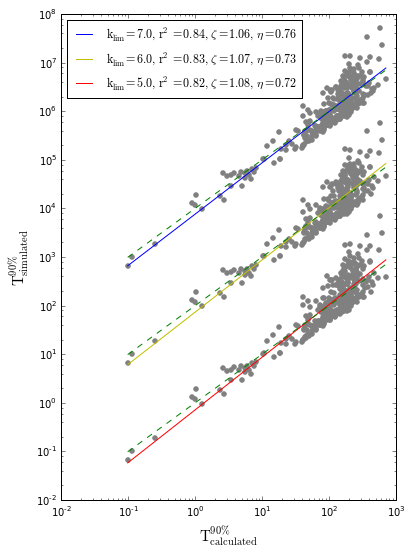

In [55]:
plt.figure(figsize=(6,9))
plt.scatter(x,y7*10000,color='gray')
plt.scatter(x,y6*100,color='gray')
plt.scatter(x,y,color='gray')

plt.plot(x_range,x_range**f7[0]*np.exp(f7[1])*10000,'b-',label='$\mathrm{k_{lim} = 7.0,\ r^2 = %0.2f,\ \zeta = %0.2f,\ \eta = %0.2f }$'%(cl7,f7[0],np.exp(f7[1]))) # A red solid line
plt.plot(x_range,x_range**f6[0]*np.exp(f6[1])*100,'y-',label='$\mathrm{k_{lim} = 6.0,\ r^2 = %0.2f,\ \zeta = %0.2f,\ \eta = %0.2f }$'%(cl6,f6[0],np.exp(f6[1]))) # A red solid line
plt.plot(x_range,x_range**zeta*eta,'r-',label='$\mathrm{k_{lim} = 5.0,\ r^2 = %0.2f,\ \zeta = %0.2f,\ \eta = %0.2f }$'%(cl,zeta,eta)) # A red solid line

plt.plot(x_range,x_range*10000,'g--') # Diagonal
plt.plot(x_range,x_range*100,'g--') # Diagonal
plt.plot(x_range,x_range,'g--') # Diagonal

plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left')
plt.xlabel('$\mathrm{{{0}_{{calculated}}}}$'.format(pl[l2]),fontsize=fontsize)
plt.ylabel('$\mathrm{{{0}_{{simulated}}}}$'.format(pl[l2]),fontsize=fontsize) # labels again
plt.gcf().subplots_adjust(bottom=0.15)    
plt.savefig('./figs/{}/T90-T90.pdf'.format(sim))

In [43]:
%%latex
$T_{simulated}$ = $\eta$ $(T_{calculated})^{\zeta}$

<IPython.core.display.Latex object>

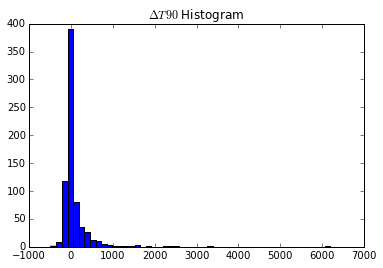

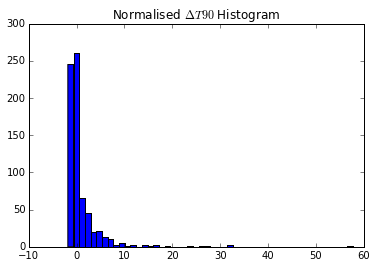

In [62]:
R['Tcal'] = omega*R['T90f']*R['Qp']**phi
R['T90prime'] = eta*R['Tcal']**zeta
R['deltaT90'] = R['T90'] - R['T90prime']
R['deltaT90norm'] = R['deltaT90']/R['T90f']
R['T90norm'] = R['T90']/R['T90f']

# Histogram of delta T90
plt.figure()
plt.hist(R['deltaT90'],bins=50)
plt.title('$\Delta T90$ Histogram')
plt.savefig('figs/metrics/deltaT90-hist.pdf')

# Histogram of normalised delta T90
plt.figure()
plt.hist(R['deltaT90norm'],bins=50)
plt.title('Normalised $\Delta T90$ Histogram')
plt.savefig('figs/metrics/deltaT90norm-hist.pdf')

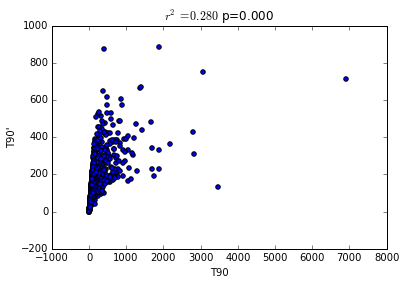

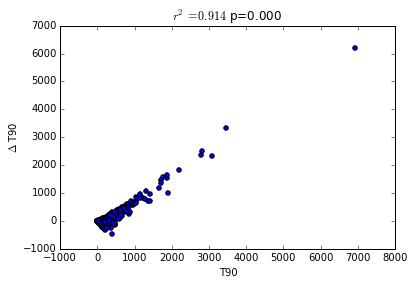

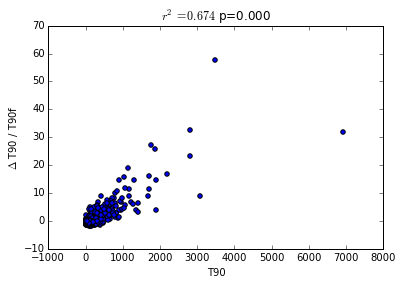

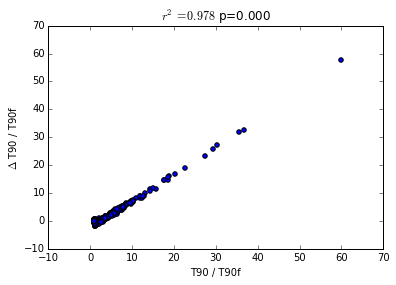

In [93]:
# T90 vs T90prime
plt.figure()
plt.scatter(R['T90'],R['T90prime'])
r,p=ss.pearsonr(R['T90'],R['T90prime'])
plt.title('$r^2 = {:0.3f}$ p={:0.3f}'.format(r**2,p))
plt.xlabel('T90')
plt.ylabel('T90\'')
# plt.xscale('log')
# plt.yscale('log')
plt.savefig('figs/metrics/T90-T90prime-log.pdf')

# T90 vs deltaT90
plt.figure()
plt.scatter(R['T90'],R['deltaT90'])
r,p=ss.pearsonr(R['T90'],R['deltaT90'])
plt.title('$r^2 = {:0.3f}$ p={:0.3f}'.format(r**2,p))
plt.xlabel('T90')
plt.ylabel('$\Delta$ T90')
# plt.xscale('log')
# plt.yscale('log')
plt.savefig('figs/metrics/T90-deltaT90-log.pdf')

# T90 vs deltaT90norm
plt.figure()
plt.scatter(R['T90'],R['deltaT90norm'])
r,p=ss.pearsonr(R['T90'],R['deltaT90norm'])
plt.title('$r^2 = {:0.3f}$ p={:0.3f}'.format(r**2,p))
plt.xlabel('T90')
plt.ylabel('$\Delta$ T90 / T90f')
# plt.xscale('log')
# plt.yscale('log')
plt.savefig('figs/metrics/T90-deltaT90norm-log.pdf')

# T90norm vs deltaT90norm
plt.figure()
plt.scatter(R['T90norm'],R['deltaT90norm'])
r,p=ss.pearsonr(R['T90norm'],R['deltaT90norm'])
plt.title('$r^2 = {:0.3f}$ p={:0.3f}'.format(r**2,p))
plt.xlabel('T90 / T90f')
plt.ylabel('$\Delta$ T90 / T90f')
# plt.xscale('log')
# plt.yscale('log')
plt.savefig('figs/metrics/T90norm-deltaT90norm-log.pdf')

/Users/bharatkunwar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: RuntimeWarning: invalid value encountered in log
/Users/bharatkunwar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:26: RuntimeWarning: invalid value encountered in log
/Users/bharatkunwar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:37: RuntimeWarning: invalid value encountered in log


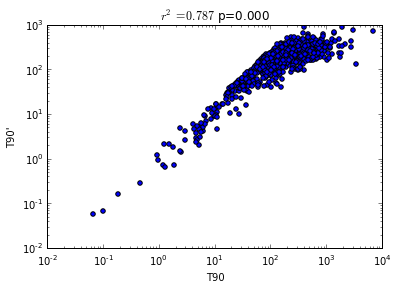

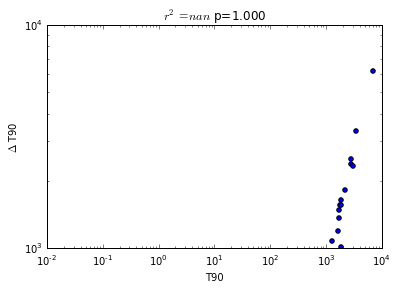

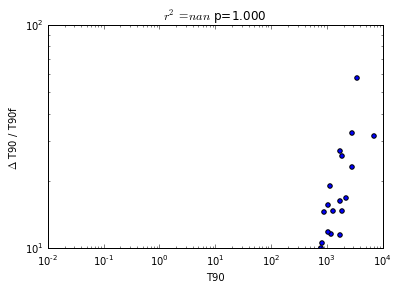

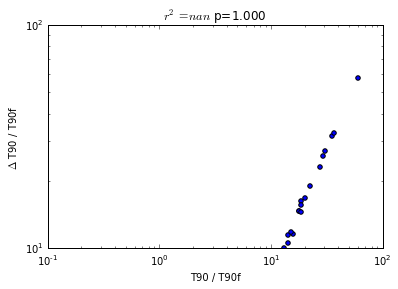

In [95]:
# T90 vs T90prime
plt.figure()
plt.scatter(R['T90'],R['T90prime'])
r,p=ss.pearsonr(np.log(R['T90']),np.log(R['T90prime']))
plt.title('$r^2 = {:0.3f}$ p={:0.3f}'.format(r**2,p))
plt.xlabel('T90')
plt.ylabel('T90\'')
plt.xscale('log')
plt.yscale('log')
plt.savefig('figs/metrics/T90-T90prime-log.pdf')

# T90 vs deltaT90
plt.figure()
plt.scatter(R['T90'],R['deltaT90'])
r,p=ss.pearsonr(np.log(R['T90']),np.log(R['deltaT90']))
plt.title('$r^2 = {:0.3f}$ p={:0.3f}'.format(r**2,p))
plt.xlabel('T90')
plt.ylabel('$\Delta$ T90')
plt.xscale('log')
plt.yscale('log')
plt.savefig('figs/metrics/T90-deltaT90-log.pdf')

# T90 vs deltaT90norm
plt.figure()
plt.scatter(R['T90'],R['deltaT90norm'])
r,p=ss.pearsonr(np.log(R['T90']),np.log(R['deltaT90norm']))
plt.title('$r^2 = {:0.3f}$ p={:0.3f}'.format(r**2,p))
plt.xlabel('T90')
plt.ylabel('$\Delta$ T90 / T90f')
plt.xscale('log')
plt.yscale('log')
plt.savefig('figs/metrics/T90-deltaT90norm-log.pdf')

# T90norm vs deltaT90norm
plt.figure()
plt.scatter(R['T90norm'],R['deltaT90norm'])
r,p=ss.pearsonr(np.log(R['T90norm']),np.log(R['deltaT90norm']))
plt.title('$r^2 = {:0.3f}$ p={:0.3f}'.format(r**2,p))
plt.xlabel('T90 / T90f')
plt.ylabel('$\Delta$ T90 / T90f')
plt.xscale('log')
plt.yscale('log')
plt.savefig('figs/metrics/T90norm-deltaT90norm-log.pdf')

In [8]:
import scipy.stats as ss
import os
def fig_corr_with(variable,threshold=0.1,draw_all=False):
    folder = 'figs/metrics/{}'.format(variable)
    if not os.path.isdir(folder):
        os.makedirs(folder)    
    for key,value in list(M.iteritems())[:]:
        r,p=ss.pearsonr(value,R[variable])
        if r > threshold or draw_all == True:
            fig=plt.figure()
            plt.scatter(value,R[variable])
            plt.xlabel(key)
            plt.ylabel(variable)
            plt.title('$r = {:0.3f}$ $r^2 = {:0.3f}$ $p = {:0.3f}$'.format(r,r**2,p))
            plt.savefig('{}/{}-{}.pdf'.format(folder,key,variable))
            print variable,key,r,r**2,p
            
fig_corr_with('deltaT90')
fig_corr_with('deltaT90norm')
fig_corr_with('T90')
fig_corr_with('T90norm')            

KeyError: 'deltaT90'

T90 mean_tdsp 0.268423300687 0.0720510683516 4.39678867702e-13
T90 num_nodes_mean_sdsp 0.301306883138 0.0907858378263 3.05821499161e-16
T90 mean_sdsp 0.533620823009 0.284751182749 4.61643932976e-53
T90 max_sdsp 0.504054639776 0.25407107988 1.23353034334e-46
T90 num_nodes_50pc_tdsp 0.314838113756 0.0991230378734 1.15525160762e-17
T90 max_tdsp 0.272023907889 0.0739970064632 2.07756377093e-13
T90 50pc_tdsp 0.267961784601 0.0718035180068 4.836334532e-13
T90 num_edges 0.299504157885 0.0897027405901 4.67175131523e-16
T90 sum_edge_length 0.433802847028 0.18818491009 1.14327752541e-33
T90 num_nodes_mean_tdsp 0.31360778574 0.0983498432768 1.56713760978e-17
T90 sum_edge_area 0.453092337674 0.205292666459 6.2059517472e-37
T90 10pc_tdsp 0.269785522527 0.0727842281651 3.31535622031e-13
T90 num_nodes 0.315207864115 0.0993559976 1.05379556776e-17
T90 num_nodes_90pc_tdsp 0.310872507031 0.0966417156276 3.07127427169e-17
T90 90pc_sdsp 0.530129540901 0.281037330136 2.86151844861e-52
T90 num_nodes_10pc_sd

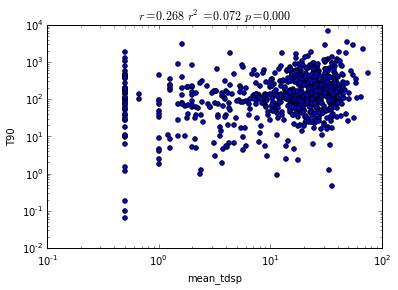

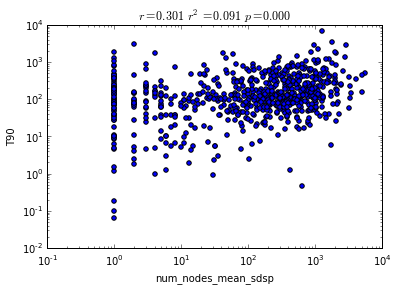

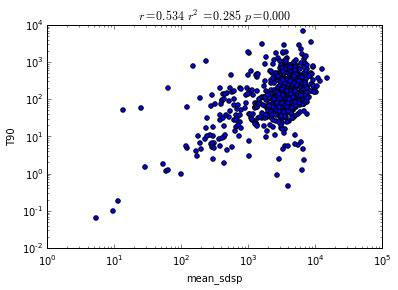

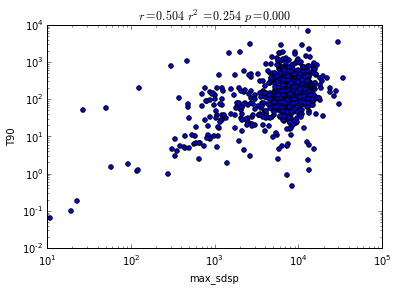

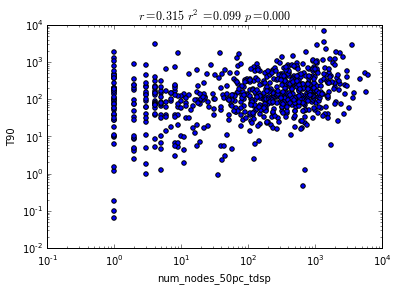

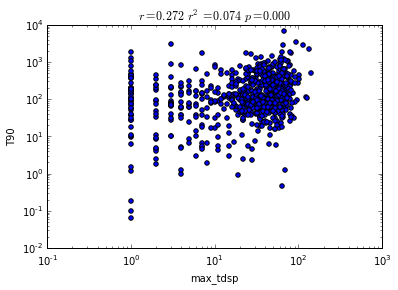

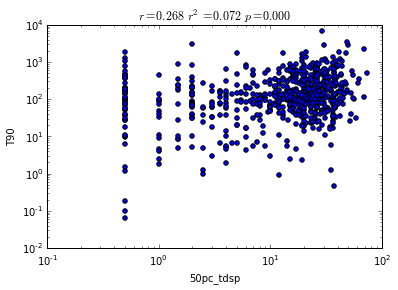

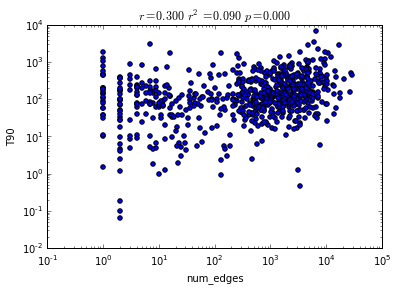

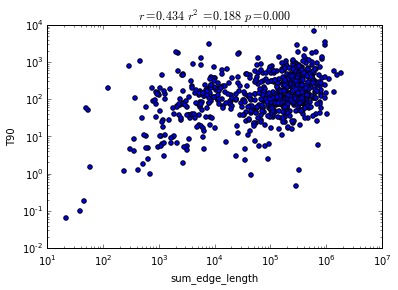

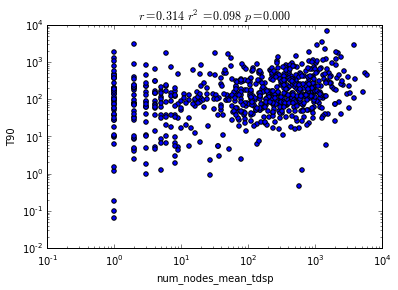

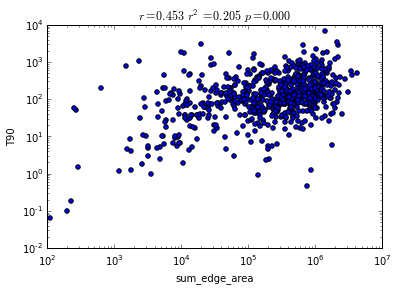

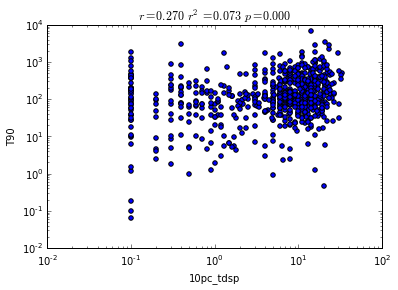

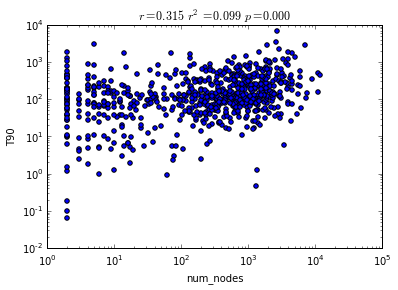

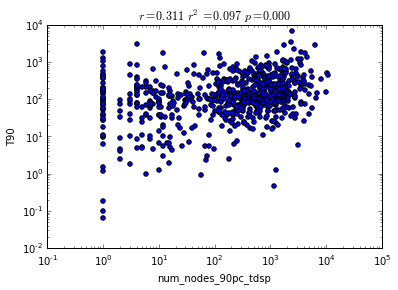

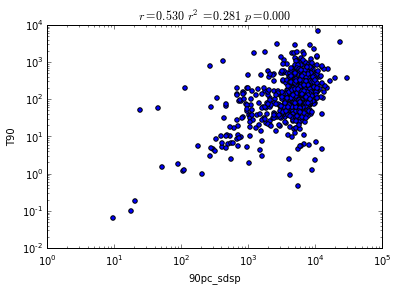

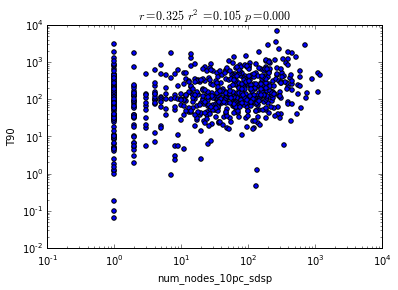

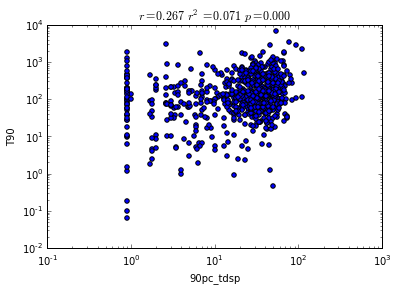

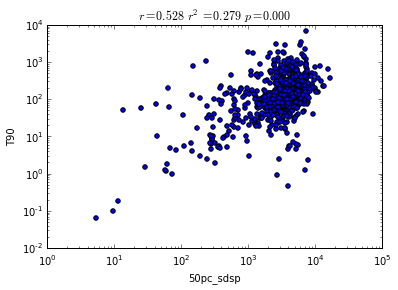

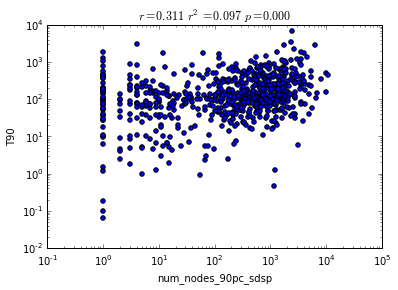

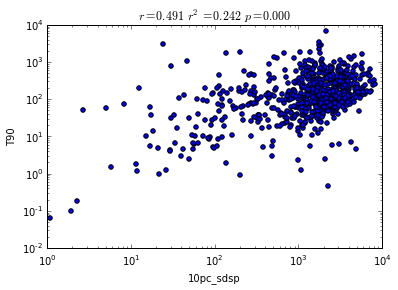

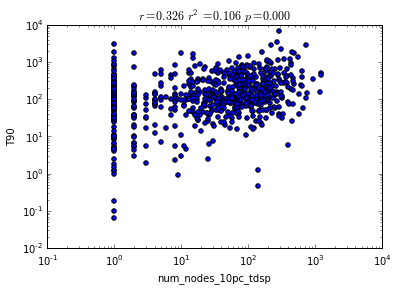

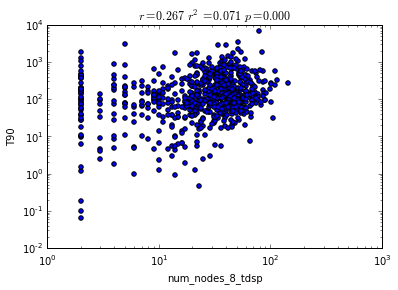

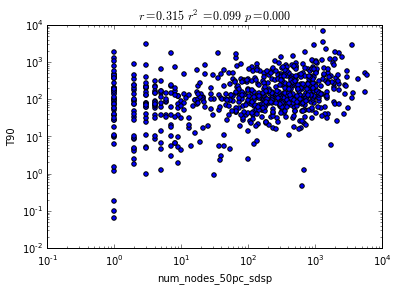

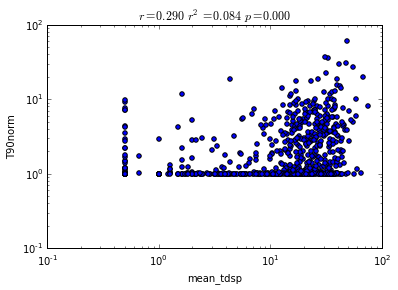

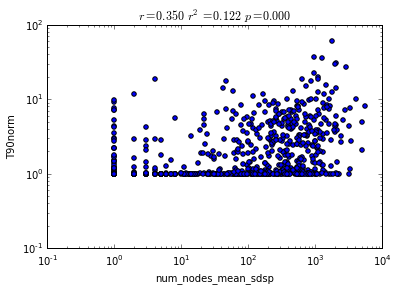

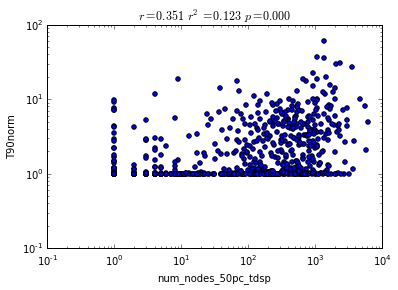

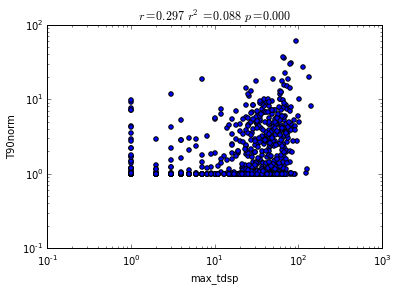

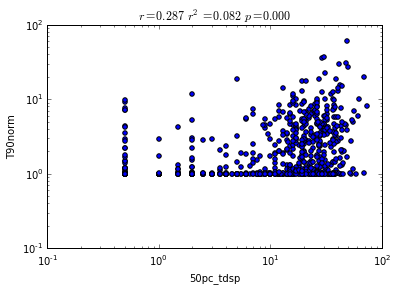

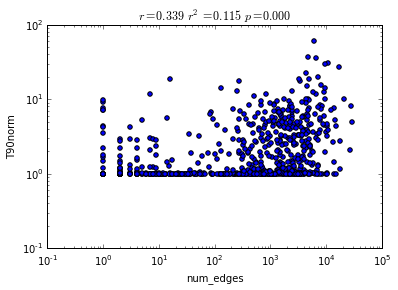

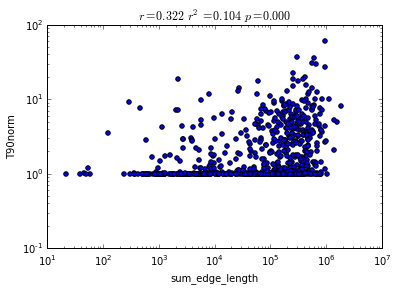

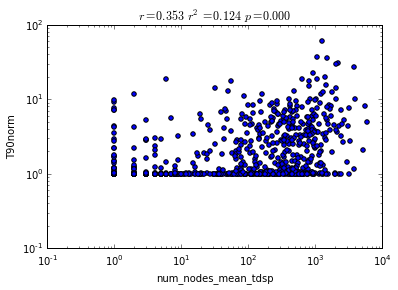

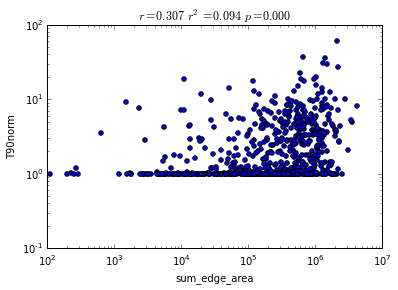

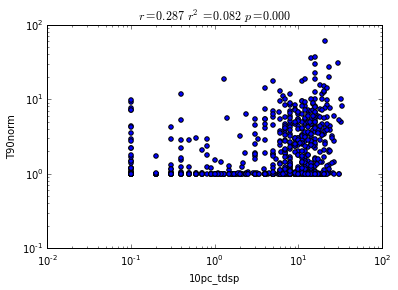

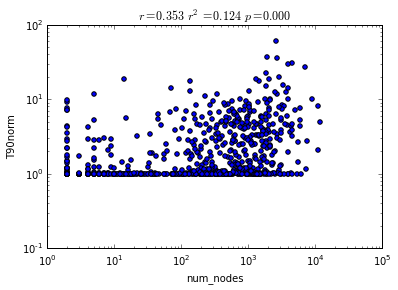

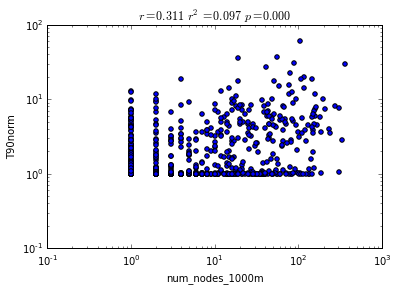

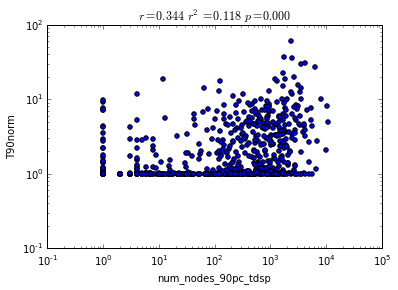

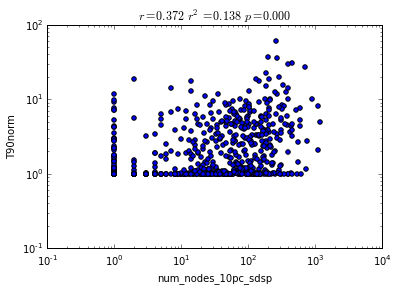

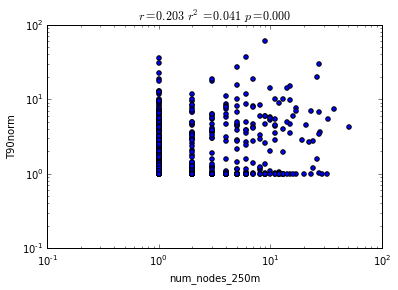

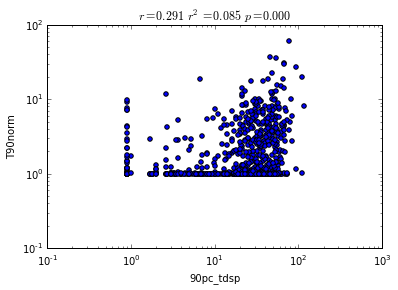

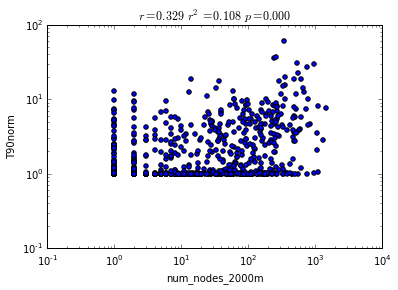

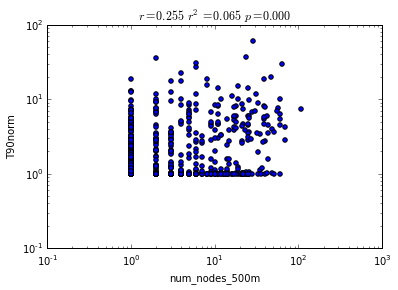

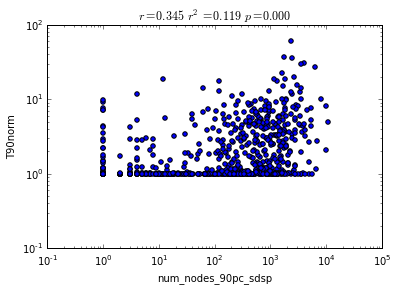

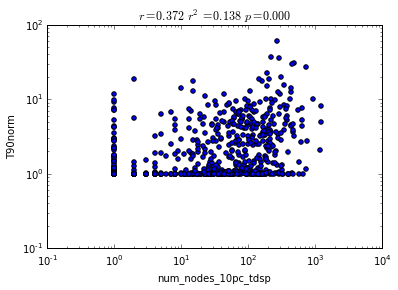

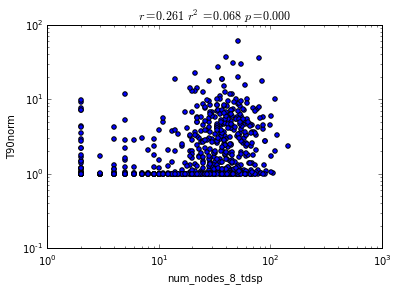

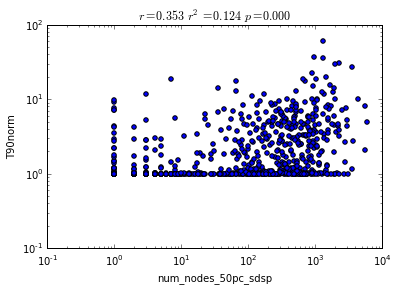

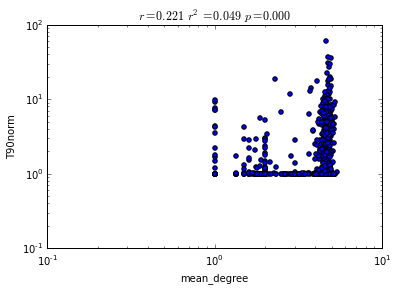

In [112]:
# Log versions of the figures
import scipy.stats as ss
def fig_corr_with(variable,threshold=0.1,draw_all=False):
    folder = 'figs/metrics/log-{}'.format(variable)
    if not os.path.isdir(folder):
        os.makedirs(folder)    
    for key,value in list(M.iteritems())[:]:
        r,p=ss.pearsonr(np.log(value),np.log(R[variable]))
        if r > threshold or draw_all == True:
            fig=plt.figure()
            plt.scatter(value,R[variable])
            plt.xlabel(key)
            plt.ylabel(variable)
            plt.xscale('log')
            plt.yscale('log')
            plt.title('$r = {:0.3f}$ $r^2 = {:0.3f}$ $p = {:0.3f}$'.format(r,r**2,p))
            plt.savefig('{}/{}-{}.pdf'.format(folder,key,variable))
            print variable,key,r,r**2,p
            
fig_corr_with('deltaT90')
fig_corr_with('deltaT90norm')
fig_corr_with('T90')
fig_corr_with('T90norm')            

In [113]:
import pandas
A=pandas.concat([pandas.DataFrame(R),pandas.DataFrame(M)],axis=1)
print A.shape
A.corr().to_csv('data/metrics/corr.csv')

(704, 267)


In [168]:
A['kc'] = A['N']/A['W']/A['D90']
A['T90p'] = [d90/fd.velocity(kc)/60 for d90,kc in zip(A['D90'],A['kc'])]
A['T90p/T90f'] = A['T90p']/A['T90f']
A['T90/T90f'] = A['T90']/A['T90f']
A['N/W'] = A['N']/A['W']

(0.055528482518311197, 0.14106011220034331)
(0.42959019615570854, 5.543274918853883e-33)


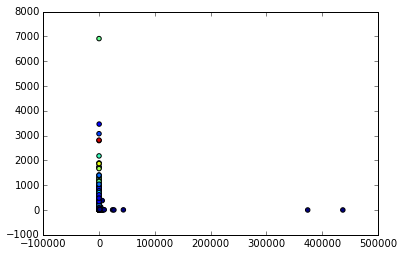

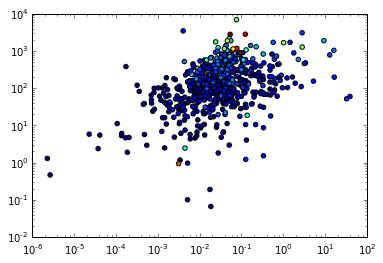

In [192]:
plt.figure()
plt.scatter(A['sum_edge_area']/A['N'],A['T90'],c=A['kc'])
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.scatter(A['N']/A['sum_edge_area'],A['T90'],c=A['kc'])
print ss.pearsonr(A['N']/A['sum_edge_area'],A['T90'])
print ss.pearsonr(np.log(A['N']/A['sum_edge_area']),np.log(A['T90']))

(0.71130436171872458, 1.3751385041325308e-109)
(0.813921270631357, 1.0147141841250325e-167)


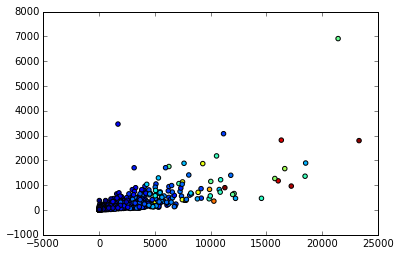

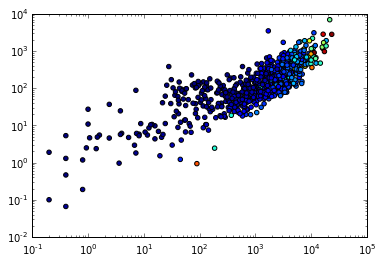

In [193]:
plt.figure()
plt.scatter(A['N/W'],A['T90'],c=A['kc'])
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.scatter(A['N/W'],A['T90'],c=A['kc'])
print ss.pearsonr(A['N/W'],A['T90'])
print ss.pearsonr(np.log(A['N/W']),np.log(A['T90']))

(0.51859662094013381, 1.0212331539873054e-49)
(0.52020880734082364, 4.5517465640513976e-50)


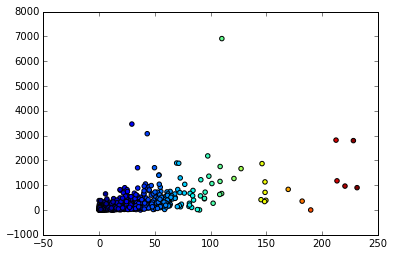

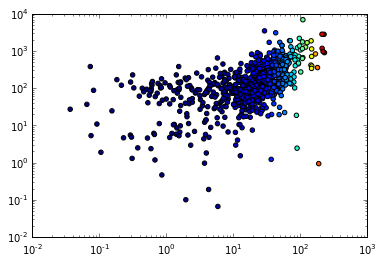

In [187]:
plt.figure()
plt.scatter(A['Qp'],A['T90'],c=A['kc'])
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.scatter(A['Qp'],A['T90'],c=A['kc'])
print ss.pearsonr(A['Qp'],A['T90'])
print ss.pearsonr(np.log(A['Qp']),np.log(A['T90']))

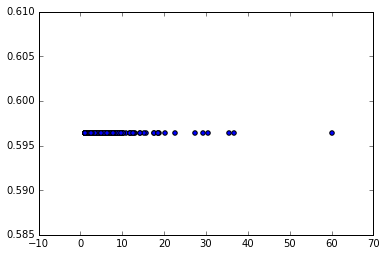

In [137]:
plt.scatter(A['T90']/A['T90f'],A['T90p']/A['T90f'])

In [325]:
data = A[['N','D90','W','Qp']]

# data = pandas.DataFrame(M)
# data.replace([np.inf, -np.inf, np.nan], 0)

train_data = data.ix[train]
train_target = np.array(A['T90/T90f'].ix[train],dtype=int)

test_data = data.ix[test]
test_target = np.array(A['T90/T90f'].ix[test],dtype=int)

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
gnb = GaussianNB()
y_pred = gnb.fit(train_data, train_target).predict(test_data)
print("Number of mislabeled points out of a total %d points : %d"
       % (len(test_target),(test_target != y_pred).sum()))

delta = train_target-y_pred
sum_delta = ((delta**2).sum())**0.5

print sum_delta/len(test_target)


# for row in zip(y_pred,test_target,test_target-y_pred):
#     print row

Number of mislabeled points out of a total 352 points : 203
0.283080589853


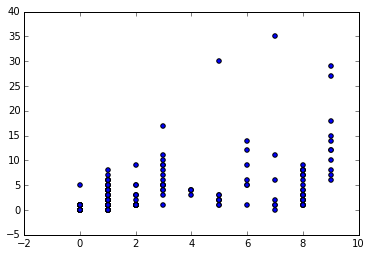

In [326]:
plt.scatter(y_pred,test_target)

In [323]:
ss.pearsonr(y_pred,test_target)

(0.72952435865585663, 1.0594381375967221e-59)